# Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import statsmodels
import time
import scipy.stats as st
import statsmodels.formula.api
import statsmodels.api
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings("ignore")

In [2]:
arbres_paris=pd.read_csv("p2-arbres-fr.csv",sep = ';')

# Cleaning des données

Affichage du jeu de données

In [3]:
arbres_paris.head()

id type_emplacement domanialite   arrondissement complement_addresse  \
0  99874            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
1  99875            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
2  99876            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
3  99877            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
4  99878            Arbre      Jardin  PARIS 17E ARRDT                 NaN   

   numero                                        lieu id_emplacement  \
0     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4     NaN  PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   

  libelle_francais      genre         espece variete  circonference_cm  \
0       Marronnier   Aesculus  hippocastanum     NaN                20   
1               If      Taxus        baccata     NaN                65   
2               If      Taxus        baccata     NaN                90   
3           Erable       Acer        negundo     NaN                60   
4     Arbre à miel  Tetradium      daniellii     NaN                38   

   hauteur_m stade_developpement  remarquable  geo_point_2d_a  geo_point_2d_b  
0          5                 NaN          0.0       48.857620        2.320962  
1          8                   A          NaN       48.857656        2.321031  
2         10                   A          NaN       48.857705        2.321061  
3          8                   A          NaN       48.857722        2.321006  
4          0                 NaN          NaN       48.890435        2.315289

In [4]:
arbres_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [5]:
#Toutes les valeurs de stade_developpement sont affichées
list(arbres_paris.stade_developpement.unique())

[nan, 'A', 'J', 'M', 'JA']

In [6]:
#Toutes les valeurs de numero sont nulles on le retire alors de notre jeu de données
list(arbres_paris.numero.unique())

[nan]

In [7]:
#Suppression de la colonne
arbres_paris = arbres_paris.drop('numero', axis=1)

In [8]:
#Toutes les valeurs de type emplacement sont les memes on le retire alors de notre jeu de données
list(arbres_paris.type_emplacement.unique())

['Arbre']

In [9]:
#Suppression de la colonne
arbres_paris = arbres_paris.drop('type_emplacement', axis=1)

L'id correspond à l'id de chaque arbre
Le type_emplacement est livre
Le domanialite est le domaine ou se situe l'arbre
L'arrondissement est l'arrondissement de Paris dans lequel se situe l'arbre
Le complement_addresse est le num de l'adresse
Le numero est vide	
Le lieu	ou se situe l'arbre
L'id_emplacement est l'id ou se situe l'arbre	
Le libelle_francais	est le nom français de l'arbre
Le genre est le genre de l'arbre
L'espece est l"espece de l'arbre
La variete est la variete de l'arbre
La circonference_cm	est la taille en cm de larbre
La hauteur_m est la hauteur en cm de l'arbre
Le stade_developpement	
Le remarquable	
Le geo_point_2d_a	
Le geo_point_2d_b

In [10]:
#Somme des doublons de id
arbres_paris["id"].duplicated().sum()

0

In [11]:
#Somme des doublons de id_emplacement
arbres_paris["id_emplacement"].duplicated().sum()

131097

Plusieurs arbres peuvent donc se situer au meme emplacement sachant que chaque arbre est unique

In [12]:
arbres_paris[['circonference_cm','hauteur_m']].describe()

circonference_cm      hauteur_m
count     200137.000000  200137.000000
mean          83.380479      13.110509
std          673.190213    1971.217387
min            0.000000       0.000000
25%           30.000000       5.000000
50%           70.000000       8.000000
75%          115.000000      12.000000
max       250255.000000  881818.000000

On observe les minimums de chaque variable pour voir si il n'y a pas de valeurs négatives qui seraient alors aberrantes et on passera plus tard à l'analyse des outliers

In [13]:
#Valeurs manquantes
print(arbres_paris.isnull().sum(axis = 0))

id                          0
domanialite                 1
arrondissement              0
complement_addresse    169235
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64


Toutes les valeurs manquantes correspondent à des variables qualitatives il est donc plus difficile de faire une imputation de valeurs

In [14]:
#Pourcentage valeurs manquantes
pourcentage_manquant = (arbres_paris.isnull().sum() / len(arbres_paris)) * 100
pourcentage_manquant

id                      0.000000
domanialite             0.000500
arrondissement          0.000000
complement_addresse    84.559577
lieu                    0.000000
id_emplacement          0.000000
libelle_francais        0.747988
genre                   0.007995
espece                  0.875400
variete                81.624088
circonference_cm        0.000000
hauteur_m               0.000000
stade_developpement    33.579498
remarquable            31.527404
geo_point_2d_a          0.000000
geo_point_2d_b          0.000000
dtype: float64

On vérifie si il y'a des arbres pour lesquelles il manque toutes les valeurs de genre,espece et variete

In [15]:
#On affiche les arbres pour lesquels il n y a aucune de ces valeurs remplies
arbres_paris[(arbres_paris['genre'].isna()) & (arbres_paris['espece'].isna()) & (arbres_paris['variete'].isna())]

id domanialite   arrondissement complement_addresse  \
195404  2018848      Jardin  PARIS 13E ARRDT                 NaN   
195409  2018853      Jardin  PARIS 13E ARRDT                 NaN   
195410  2018854      Jardin  PARIS 13E ARRDT                 NaN   
195475  2018919      Jardin  PARIS 13E ARRDT                 NaN   
195476  2018920      Jardin  PARIS 13E ARRDT                 NaN   
195487  2018932      Jardin  PARIS 13E ARRDT                 NaN   
195496  2018942      Jardin  PARIS 13E ARRDT                 NaN   
195497  2018943      Jardin  PARIS 13E ARRDT                 NaN   
195499  2018945      Jardin  PARIS 13E ARRDT                 NaN   
195502  2018948      Jardin  PARIS 13E ARRDT                 NaN   
195503  2018949      Jardin  PARIS 13E ARRDT                 NaN   
195505  2018951      Jardin  PARIS 13E ARRDT                 NaN   
195509  2018955      Jardin  PARIS 13E ARRDT                 NaN   
195514  2018960      Jardin  PARIS 13E ARRDT                 NaN   
195518  2018964      Jardin  PARIS 13E ARRDT                 NaN   
195519  2018965      Jardin  PARIS 13E ARRDT                 NaN   

                                                     lieu id_emplacement  \
195404  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         102027   
195409  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         104005   
195410  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         104006   
195475  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         104030   
195476  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         104031   
195487  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         105006   
195496  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         105017   
195497  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         105019   
195499  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         105022   
195502  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         105025   
195503  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         106001   
195505  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         106003   
195509  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         104009   
195514  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         104019   
195518  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         104023   
195519  PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...         104025   

       libelle_francais genre espece variete  circonference_cm  hauteur_m  \
195404              NaN   NaN    NaN     NaN                 0          0   
195409              NaN   NaN    NaN     NaN                 0          0   
195410              NaN   NaN    NaN     NaN                 0          0   
195475              NaN   NaN    NaN     NaN                 0          0   
195476              NaN   NaN    NaN     NaN                 0          0   
195487              NaN   NaN    NaN     NaN                 0          0   
195496              NaN   NaN    NaN     NaN                 0          0   
195497              NaN   NaN    NaN     NaN                 0          0   
195499              NaN   NaN    NaN     NaN                 0          0   
195502              NaN   NaN    NaN     NaN                 0          0   
195503              NaN   NaN    NaN     NaN                 0          0   
195505              NaN   NaN    NaN     NaN                 0          0   
195509              NaN   NaN    NaN     NaN                 0          0   
195514              NaN   NaN    NaN     NaN                 0          0   
195518              NaN   NaN    NaN     NaN                 0          0   
195519              NaN   NaN    NaN     NaN                 0          0   

       stade_developpement  remarquable  geo_point_2d_a  geo_point_2d_b  
195404                 NaN          0.0       48.821289        2.354485  
195409                 NaN          0.0       48.821259        2.354242  
195410                 NaN     

In [16]:
#On supprime alors ces arbres
arbres_paris = arbres_paris[~(arbres_paris['genre'].isna() & arbres_paris['espece'].isna() & arbres_paris['variete'].isna())]

# Valeurs manquantes

On remplace les valeurs manquantes remarquable à l'aide de l id dev

In [17]:
# Grouper par l'id_emplacement et remplacer les valeurs manquantes dans la colonne 'remarquable'
arbres_paris['remarquable'] =arbres_paris.groupby('id_emplacement')['remarquable'].transform\
(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
# Afficher le DataFrame mis à jour
print(arbres_paris)

             id domanialite     arrondissement complement_addresse  \
0         99874      Jardin     PARIS 7E ARRDT                 NaN   
1         99875      Jardin     PARIS 7E ARRDT                 NaN   
2         99876      Jardin     PARIS 7E ARRDT                 NaN   
3         99877      Jardin     PARIS 7E ARRDT                 NaN   
4         99878      Jardin    PARIS 17E ARRDT                 NaN   
...         ...         ...                ...                 ...   
200132  2024741      Jardin  BOIS DE VINCENNES                 NaN   
200133  2024742      Jardin  BOIS DE VINCENNES                 NaN   
200134  2024743      Jardin  BOIS DE VINCENNES                 NaN   
200135  2024744      Jardin  BOIS DE VINCENNES                 NaN   
200136  2024745      Jardin  BOIS DE VINCENNES                 NaN   

                                                     lieu id_emplacement  \
0               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1      

In [18]:
#Pourcentage valeurs manquantes
pourcentage_manquant = (arbres_paris.isnull().sum() / len(arbres_paris)) * 100
pourcentage_manquant

id                      0.000000
domanialite             0.000500
arrondissement          0.000000
complement_addresse    84.558342
lieu                    0.000000
id_emplacement          0.000000
libelle_francais        0.740052
genre                   0.000000
espece                  0.867475
variete                81.622618
circonference_cm        0.000000
hauteur_m               0.000000
stade_developpement    33.574188
remarquable            16.102258
geo_point_2d_a          0.000000
geo_point_2d_b          0.000000
dtype: float64

# Analyse des outliers

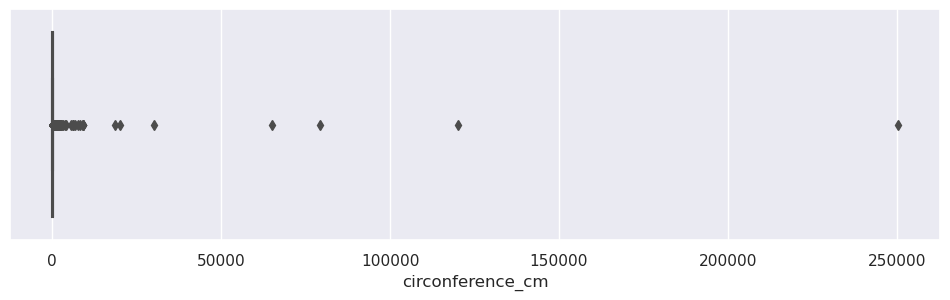

30.0
115.0
85.0
-97.5
242.5


In [19]:
#Représentation la variable circonference_cm sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=arbres_paris["circonference_cm"], color="b")
plt.show()
Arbre_circonference= arbres_paris["circonference_cm"]
Arbre_circonference = sorted(Arbre_circonference)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(Arbre_circonference,[25,75])
print(q1)
print(q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print(iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print(trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print(trait_superieur)

In [20]:
#Recherche des outliers inferieurs
arbres_paris.loc[arbres_paris["circonference_cm"]>242.5].sort_values(by="circonference_cm", ascending=False).head(10)


id domanialite   arrondissement complement_addresse  \
149056  272885  Alignement  PARIS 18E ARRDT                 NaN   
160432  284823  Alignement  PARIS 18E ARRDT                 NaN   
173343  298211  Alignement   PARIS 5E ARRDT                 NaN   
147634  271402  Alignement   PARIS 7E ARRDT                 NaN   
91256   212024  Alignement  PARIS 12E ARRDT                 NaN   
90605   211362  Alignement   PARIS 5E ARRDT                  34   
71787   190080       DASCO  PARIS 20E ARRDT                 NaN   
147235  270997  Alignement   PARIS 7E ARRDT                 NaN   
164616  289121  Alignement  PARIS 12E ARRDT                 NaN   
152303  276396  Alignement   PARIS 7E ARRDT                 NaN   

                                      lieu id_emplacement libelle_francais  \
149056                PLACE DE LA CHAPELLE         101026          Platane   
160432  AVENUE DE LA PORTE DE CLIGNANCOURT         202005          Platane   
173343             BOULEVARD DE PORT ROYAL         402001       Marronnier   
147634                      AVENUE BOSQUET        1202016          Platane   
91256                        RUE DE CHALON         202005      Micocoulier   
90605               BOULEVARD SAINT MARCEL         204025          Cedrele   
71787                    PLAINE (9) ELEM B       11110006          Tilleul   
147235                         QUAI BRANLY         503005        Paulownia   
164616               RUE FRANCOIS TRUFFAUT         301005          Platane   
152303             ESPLANADE DES INVALIDES         402011          Tilleul   

            genre        espece   variete  circonference_cm  hauteur_m  \
149056   Platanus   x hispanica       NaN            250255         22   
160432   Platanus    orientalis       NaN            120170         20   
173343   Aesculus      x carnea  Briotii'             79120         10   
147634   Platanus  occidentalis       NaN             65110         16   
91256      Celtis     australis       NaN             30140         10   
90605       Toona      sinensis       NaN             20130         16   
71787       Tilia     tomentosa       NaN             18589         15   
147235  Paulownia     tomentosa       NaN              9155         15   
164616   Platanus   x hispanica       NaN              9095         10   
152303      Tilia     tomentosa       NaN              9085         12   

       stade_developpement  remarquable  geo_point_2d_a  geo_point_2d_b  
149056                   A          0.0       48.884837        2.360229  
160432                   A          0.0       48.898590        2.344364  
173343                   A          0.0       48.837227        2.348598  
147634                   A          0.0       48.855390        2.305025  
91256                    A          0.0       48.845542        2.374680  
90605                    A          0.0       48.839108        2.358677  
71787                    A          0.0       48.850037        2.400146  
147235                   A          0.0       48.858357        2.292727  
164616                   A          0.0       48.834558        2.387590  
152303                   A          0.0       48.860368        2.314141

In [21]:
#On supprime les 4 arbres ayant une circonference largement supperieurs aux autres
arbres_paris = arbres_paris[~((arbres_paris['id'] == 272885) | (arbres_paris['id'] == 284823)|(arbres_paris['id'] == 298211) |(arbres_paris['id'] == 271402) )]

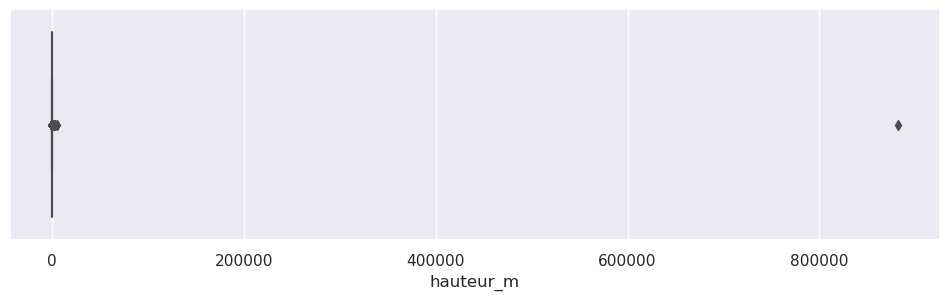

5.0
12.0
7.0
-5.5
22.5


In [22]:
#Représentation la variable hauteur_m sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=arbres_paris["hauteur_m"], color="b")
plt.show()
Arbre_hauteur_m= arbres_paris["hauteur_m"]
Arbre_hauteur_m= sorted(Arbre_hauteur_m)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(Arbre_hauteur_m,[25,75])
print(q1)
print(q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print(iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print(trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print(trait_superieur)

In [23]:
#Recherche des outliers 
arbres_paris.loc[arbres_paris["hauteur_m"]>22.5].sort_values(by="hauteur_m", ascending=False).head(10)


id domanialite     arrondissement complement_addresse  \
182852  2003429  Alignement  BOIS DE VINCENNES                 NaN   
150101   274101  Alignement    PARIS 11E ARRDT                 NaN   
152110   276202  Alignement     PARIS 7E ARRDT                 286   
101985   223083  Alignement     PARIS 7E ARRDT                 193   
152205   276297  Alignement     PARIS 7E ARRDT                 NaN   
147984   271760  Alignement     PARIS 7E ARRDT                 NaN   
151382   275469  Alignement     PARIS 7E ARRDT                 NaN   
152238   276330  Alignement     PARIS 7E ARRDT                 NaN   
152437   276530  Alignement     PARIS 7E ARRDT                 NaN   
153314   277439  Alignement     PARIS 7E ARRDT                  23   

                           lieu id_emplacement libelle_francais     genre  \
182852     ROUTE DE LA PYRAMIDE         301046          Tilleul     Tilia   
150101  AVENUE PHILIPPE AUGUSTE         101004          Sophora   Sophora   
152110  BOULEVARD SAINT GERMAIN        6202008          Platane  Platanus   
101985  BOULEVARD SAINT GERMAIN        4301006          Platane  Platanus   
152205  ESPLANADE DES INVALIDES         410006          Tilleul     Tilia   
147984           AVENUE BOSQUET         901008          Platane  Platanus   
151382  ESPLANADE DES INVALIDES         410011          Tilleul     Tilia   
152238  ESPLANADE DES INVALIDES         408014          Tilleul     Tilia   
152437  ESPLANADE DES INVALIDES         408011          Tilleul     Tilia   
153314          AVENUE DE SEGUR         501003          Platane  Platanus   

              espece variete  circonference_cm  hauteur_m stade_developpement  \
182852     tomentosa     NaN               125     881818                   J   
150101      japonica     NaN               155       5155                  JA   
152110  occidentalis     NaN               215       2525                   A   
101985   x hispanica     NaN               130       2015                   A   
152205     tomentosa     NaN               130       1815                   A   
147984  occidentalis     NaN               130       1610                   A   
151382     tomentosa     NaN                85       1515                   A   
152238     tomentosa     NaN                90       1515                  JA   
152437     tomentosa     NaN               110       1515                  JA   
153314   x hispanica     NaN               150       1514                   A   

        remarquable  geo_point_2d_a  geo_point_2d_b  
182852          0.0       48.823514        2.458010  
150101          0.0       48.849641        2.395007  
152110          0.0       48.861813        2.320157  
101985          0.0       48.854991        2.328282  
152205          0.0       48.860649        2.314739  
147984          0.0       48.856778        2.304586  
151382          0.0       48.860430        2.314716  
152238          0.0       48.860305        2.314557  
152437          0.0       48.860437        2.314575  
153314          0.0       48.851343        2.309778

In [24]:
#On supprime l arbre ayant une hauteur largement supperieurs aux autres
arbres_paris = arbres_paris[~((arbres_paris['id'] == 2003429))]

# Analyse des données

In [26]:
# Nombre d'arbre par arrondissement
print(arbres_paris["arrondissement"].value_counts())

PARIS 15E ARRDT      17151
PARIS 13E ARRDT      16696
PARIS 16E ARRDT      16403
PARIS 20E ARRDT      15340
PARIS 19E ARRDT      13709
PARIS 12E ARRDT      12600
SEINE-SAINT-DENIS    11570
BOIS DE VINCENNES    11509
PARIS 14E ARRDT      11399
PARIS 17E ARRDT      10762
PARIS 18E ARRDT      10009
PARIS 7E ARRDT        8617
VAL-DE-MARNE          7580
PARIS 8E ARRDT        7245
PARIS 11E ARRDT       5658
HAUTS-DE-SEINE        5298
BOIS DE BOULOGNE      3978
PARIS 10E ARRDT       3385
PARIS 4E ARRDT        2740
PARIS 5E ARRDT        2368
PARIS 6E ARRDT        1764
PARIS 1ER ARRDT       1413
PARIS 3E ARRDT        1209
PARIS 9E ARRDT        1167
PARIS 2E ARRDT         548
Name: arrondissement, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

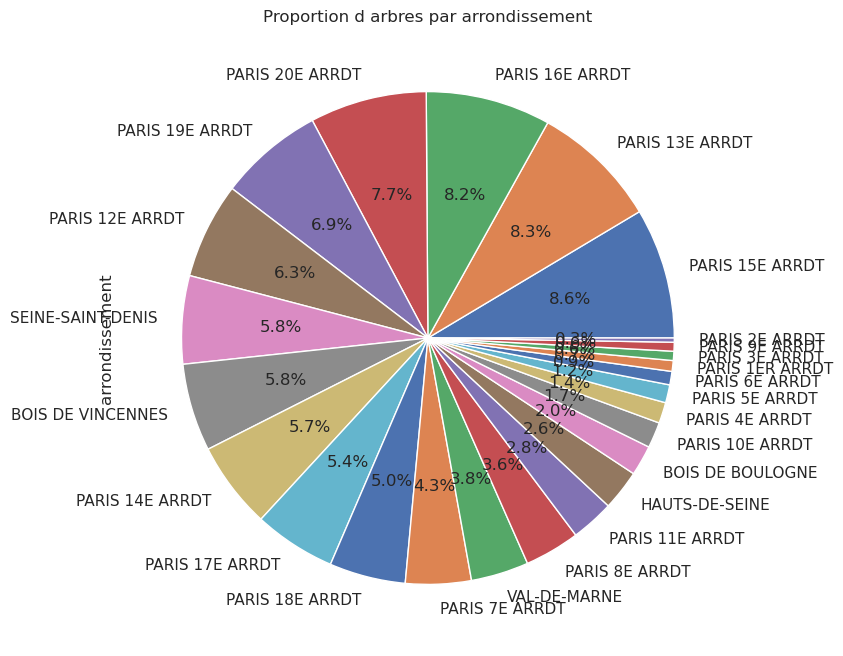

In [27]:
# Proportion d arbres par arrondissement
plt.figure(figsize=(20,8))
arbres_paris['arrondissement'].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%')
plt.title('Proportion d arbres par arrondissement')
plt.show

In [28]:
def calculer_nombre_arbres_par_metre_carre(dataframe):
    # Compter le nombre total d'arbres
    nombre_total_arbres = len(dataframe)
    
    # Calculer la superficie totale couverte par les arbres
    superficie_totale = dataframe['circonference_cm'].sum() / 10000  # Convertir en mètres carrés
    
    # Calculer le nombre d'arbres par mètre carré
    nombre_arbres_par_metre_carre = nombre_total_arbres / superficie_totale
    
    return nombre_arbres_par_metre_carre

#On applique la fonction à notre dataframe
nombre_arbres = calculer_nombre_arbres_par_metre_carre(arbres_paris)
print(f"Le nombre d'arbres par mètre carré est : {nombre_arbres}")


Le nombre d'arbres par mètre carré est : 122.6441013646591


In [29]:
#On utilise la méthode value_counts pour compter les occurrences de chaque id_emplacement
occurrences_id_emplacement = arbres_paris['id_emplacement'].value_counts()
occurrences_id_emplacement.sort_values(ascending=False).head()

101001    1324
101002    1241
101003    1128
202001    1032
101004    1020
Name: id_emplacement, dtype: int64

In [30]:
# Liste des id_emplacement avec le plus d'arbres
id_emplacements = ['101001', '101002', '101003', '202001', '101004']

# Boucle pour rechercher chaque id_emplacement
for id_emplacement in id_emplacements:
    resultat_recherche = arbres_paris.loc[arbres_paris['id_emplacement'] == id_emplacement]
    print(f"Résultat pour l'id_emplacement {id_emplacement}:")
    print(resultat_recherche)
    


Résultat pour l'id_emplacement 101001:
             id domanialite   arrondissement complement_addresse  \
4410     105754      Jardin  PARIS 20E ARRDT                 NaN   
6515     108036      Jardin  PARIS 20E ARRDT                 NaN   
6526     108047      Jardin  PARIS 20E ARRDT                 NaN   
7904     109641      Jardin  PARIS 1ER ARRDT                 NaN   
7920     109658      Jardin  PARIS 1ER ARRDT                 NaN   
...         ...         ...              ...                 ...   
198681  2022754  Alignement  PARIS 11E ARRDT                 NaN   
198697  2022782      Jardin  PARIS 13E ARRDT                 NaN   
198743  2022835      Jardin  PARIS 13E ARRDT                 NaN   
198798  2023156         DJS  PARIS 20E ARRDT                 NaN   
198871  2023421  Alignement   PARIS 5E ARRDT                 NaN   

                                                     lieu id_emplacement  \
4410                       SQUARE SEVERINE / 1 RUE LE VAU         10

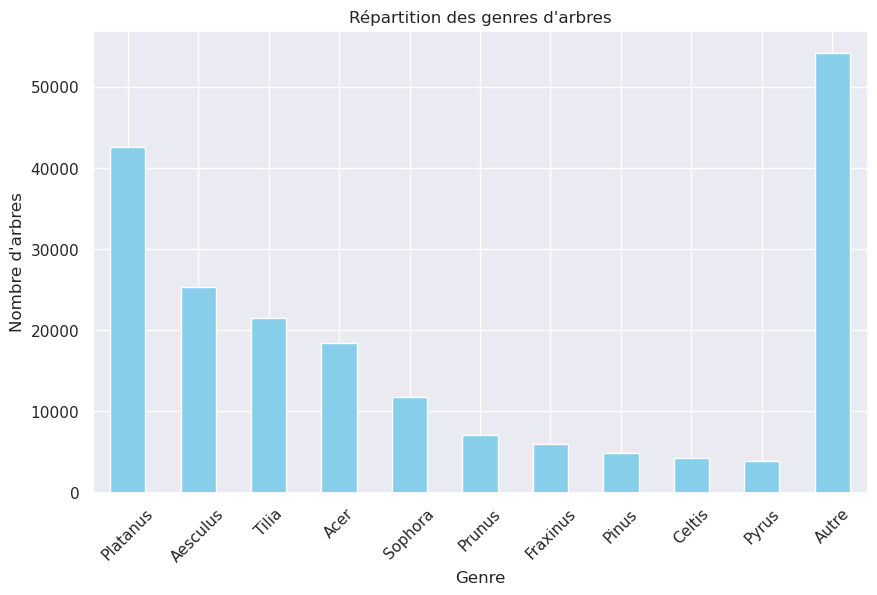

In [31]:
# Grouper les données par genre et compter le nombre d'occurrences
genre_counts = arbres_paris['genre'].value_counts()
# Afficher les 10 genres les plus courants
top_10_genres = genre_counts.head(10)
# Créer une nouvelle catégorie 'Autre' pour regrouper les autres genres
autres_genres = genre_counts[10:].sum()
genre_counts = genre_counts.head(10).append(pd.Series({'Autre': autres_genres}))
# Ré-afficher le graphique à barres mis à jour
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition des genres d\'arbres')
plt.xlabel('Genre')
plt.ylabel('Nombre d\'arbres')
plt.xticks(rotation=45)
plt.show()


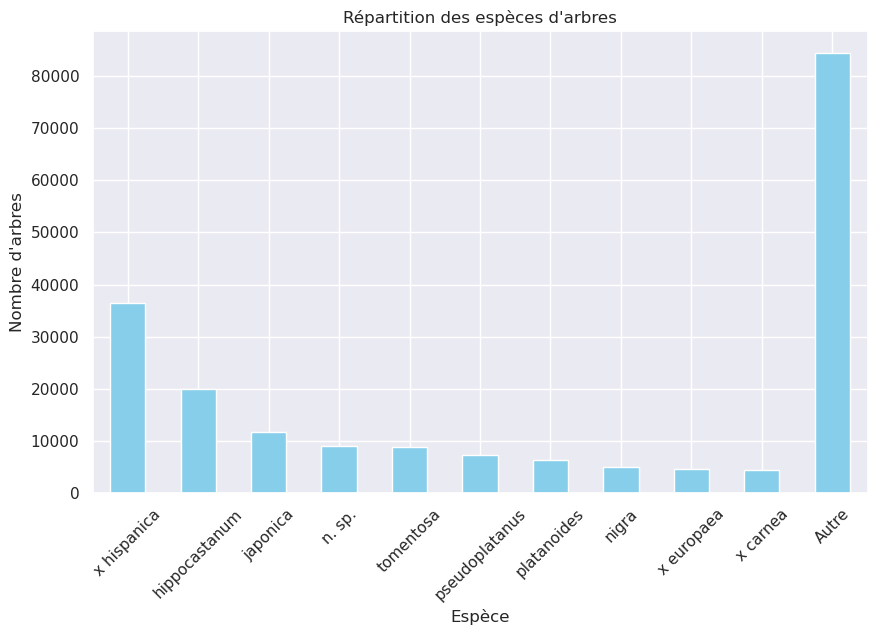

In [32]:
# Grouper les données par espèce et compter le nombre d'occurrences
espece_counts = arbres_paris['espece'].value_counts()

# Afficher les 10 espèces les plus courantes
top_10_especes = espece_counts.head(10)

# Créer une nouvelle catégorie 'Autre' pour regrouper les autres espèces
autres_especes = espece_counts[10:].sum()
espece_counts = espece_counts.head(10).append(pd.Series({'Autre': autres_especes}))

# Ré-afficher le graphique à barres mis à jour
plt.figure(figsize=(10, 6))
espece_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition des espèces d\'arbres')
plt.xlabel('Espèce')
plt.ylabel('Nombre d\'arbres')
plt.xticks(rotation=45)
plt.show()


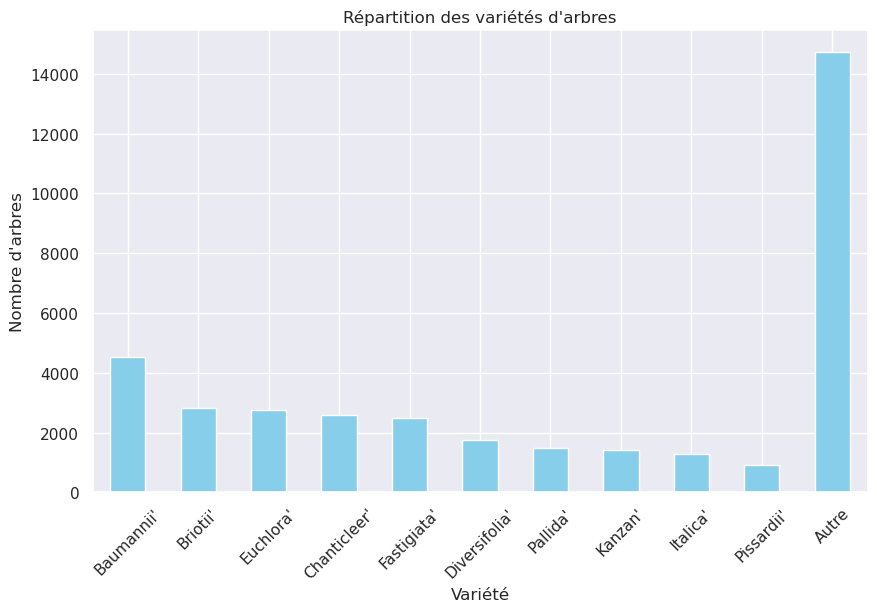

In [33]:
# Grouper les données par variété et compter le nombre d'occurrences
variete_counts = arbres_paris['variete'].value_counts()

# Afficher les 10 variétés les plus courantes
top_10_varietes = variete_counts.head(10)

# Créer une nouvelle catégorie 'Autre' pour regrouper les autres variétés
autres_varietes = variete_counts[10:].sum()
variete_counts = variete_counts.head(10).append(pd.Series({'Autre': autres_varietes}))

# Ré-afficher le graphique à barres mis à jour
plt.figure(figsize=(10, 6))
variete_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition des variétés d\'arbres')
plt.xlabel('Variété')
plt.ylabel('Nombre d\'arbres')
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

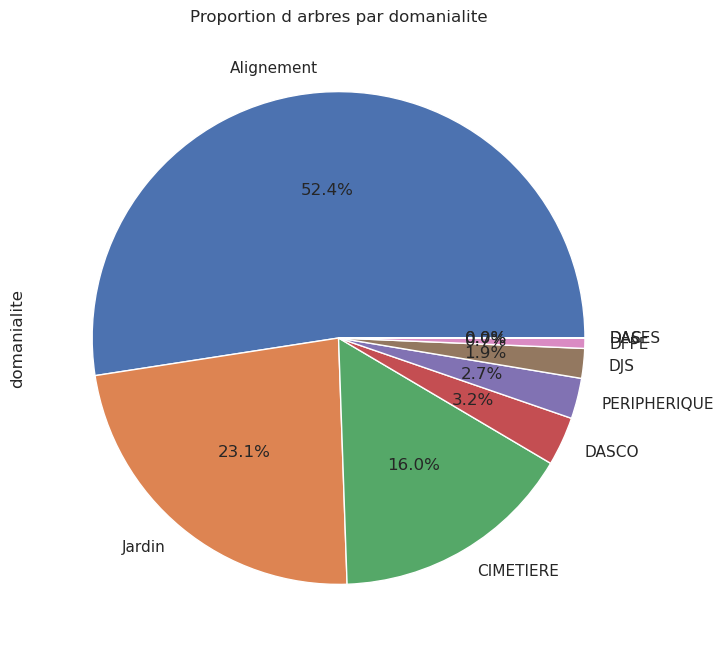

In [34]:
# Proportion d arbres par domanialite
plt.figure(figsize=(20,8))
arbres_paris['domanialite'].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%')
plt.title('Proportion d arbres par domanialite')
plt.show

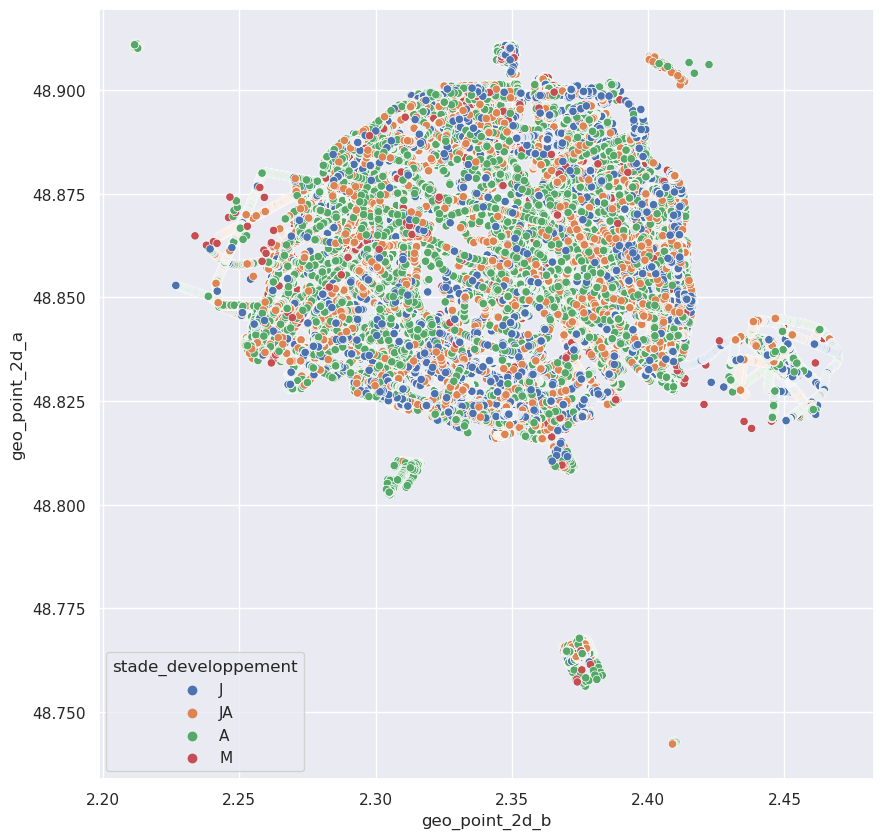

In [35]:
#Nuage de points des Geo point en fonction de leur stade de developpement
fig = plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=arbres_paris,
                x="geo_point_2d_b",
                y="geo_point_2d_a",
                hue='stade_developpement',
                hue_order=['J', 'JA', 'A', 'M'])

<function matplotlib.pyplot.show(close=None, block=None)>

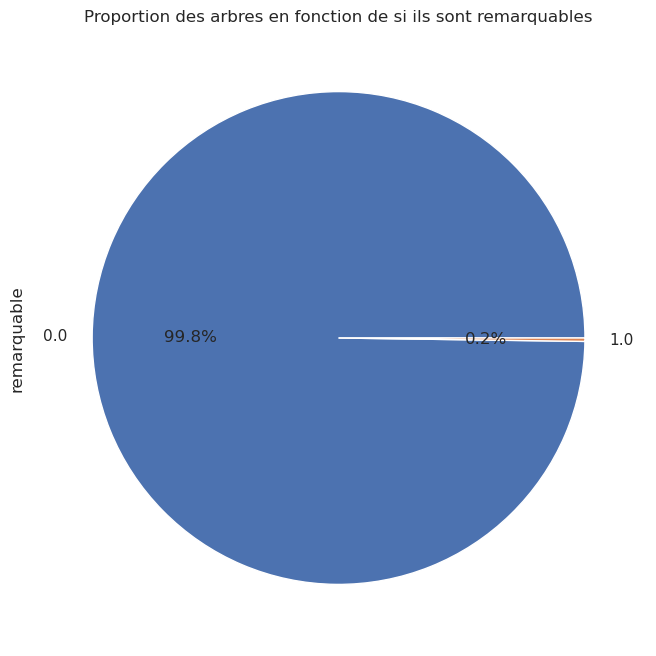

In [36]:
# Proportion d arbres par domanialite
plt.figure(figsize=(20,8))
arbres_paris['remarquable'].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%')
plt.title('Proportion des arbres en fonction de si ils sont remarquables')
plt.show
